<center>
    <h1> Math761: HW 2 <br>
    Basic Simulation Practice & Inverse Transform Method </h1>
    </center>


### Exercise 1

From our first day of class, we saw a problem where 5 students sat in a room at the following coordinates

$(.2, .9) \quad (.6, .7) \quad  (.4, .3) \quad (.5, .5) \quad (.1, .8)$

#### a) Using simulation, please approximate the p-value that we would see data as extreme as this data (one sided test) if the students really were sitting randomly, independently uniformly around the classroom.

p_value = 0.176

#### b) Then answer: what is your conclusion about how students sat in class?

$H_0$ : Students are sittting uniformly in the classroom.<br>
$H_a$ : Students are not sitting uniformly in classroom.

$p > 0.05$ Therefore we fail to reject $H_0$, and conculde that there is insufficient evidence to say students are not sitting uniformly in classroom.






In [3]:
#Coordinates vectors of students sit in a room.
x_vec = c(.2, .6, .4, .5, .1)
y_vec = c(.9, .7, .3, .5 ,.8)

In [4]:
#distance function calculates distance between students
distance_stat = function(x_vec, y_vec){
    
    total_distance = 0 # initialize
    
    for(i in 1:(length(x_vec)-1)){
        
        for(j in (i+1):length(x_vec)){
            
            pair_distance = sqrt((x_vec[i]-x_vec[j])^2 + (y_vec[i]-y_vec[j])^2)
            total_distance = total_distance + pair_distance
        }
    }
    
    return(total_distance)
}


x_vec
y_vec
s = distance_stat(x_vec, y_vec)
s

[1] 0.2 0.6 0.4 0.5 0.1

[1] 0.9 0.7 0.3 0.5 0.8

[1] 4.208515

In [5]:
#Monte Carlo Simulation
n_students = 5
n_draws = 1000
save_distances = vector(length=n_draws)
for(i in 1:n_draws){
    unif_draw_x = runif(n_students)
    unif_draw_y = runif(n_students)
    unif_s = distance_stat(unif_draw_x, unif_draw_y)
    save_distances[i] = unif_s
}

mean(save_distances) # roughly where the true mean should be

[1] 5.229685

In [6]:
# generate random vectors
unif_draw_x = runif(n_students, max= 1, min= 0)
unif_draw_y = runif(n_students, max= 1, min= 0)

# what are we doing now? Let's go over this line by line.
unif_s = distance_stat(unif_draw_x, unif_draw_y)
unif_s
indicator = as.integer(unif_s < s)
indicator

[1] 5.388678

[1] 0

In [7]:
#Continue the Monte Carlo algorithm

n = 1000
indicator_vec = vector(length=n) # to save indicators
indicator_vec

for(i in 1:n){
    unif_draw_x = runif(n_students)
    unif_draw_y = runif(n_students)
    unif_s = distance_stat(unif_draw_x, unif_draw_y)
    indicator = as.integer(unif_s < s)
    indicator_vec[i] = indicator
}

mean(indicator_vec)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALS

[1] 0.176

### Exercise 2


Suppose X has density $f_{x}(x) = 2(1-x)\textbf{1}\{x \in [0,1] \}$.

#### Generate 1000 random variables from X's distribution. Then plot them in a histogram and add a line showing the theoretical density.

### Answer
$f_{x}(x) = 2(1-x)$ where $0 \le x \le 1$. First, I found cdf.
$F_{x}(x) = \int_{0}^{x} 2(1-s)ds = 2x-x^2 $ where $0 \le x \le 1$ <br><br>
Second, I found $F^{-1}(u)= 1 \pm \sqrt{1-u} = 1 \pm \sqrt{u}$. Since $0 \le x \le 1$ and $0 < u < 1$ I used $F^{-1}(u)= 1 - \sqrt{u}$.

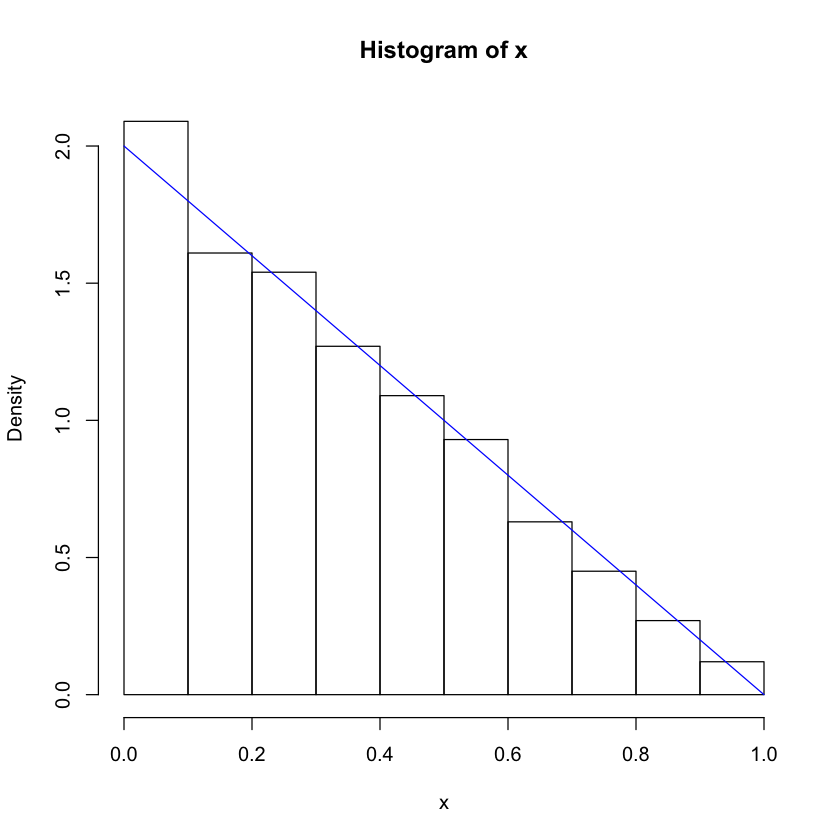

In [12]:
n = 1000
u = runif(n)
x = (1-sqrt(u))
hist(x, prob=TRUE)
y = seq(0, 1, 0.1)

lines(y, 2*(1-y), col="blue")


In [2]:
1/1-exp(0)

[1] 0

### Exercise 3

We proved in class that the inverse probability method works when we define the inverse of y=f(x) as

$ inf \{t: f(t)\geq y\}$

This is actually a "pseudo inverse".

If f(x) is a continuous function, it actually has a real inverse, and the proof is a little simpler. Please watch this video https://www.youtube.com/watch?v=irheiVXJRm8 that shows how this proof works.

#### a) Try to understand it and then re-write the proof in your own words, as if you were trying to explain it to another student. If you want to handwrite your proof, just make sure to submit it as part of your assignment (along with this file).
#### b) Also summarize what you think are the main differences between the proof we did in class and the proof you wrote up in part a. This can have many answers, but mostly i just want you to think carefully about the two proofs.


### a)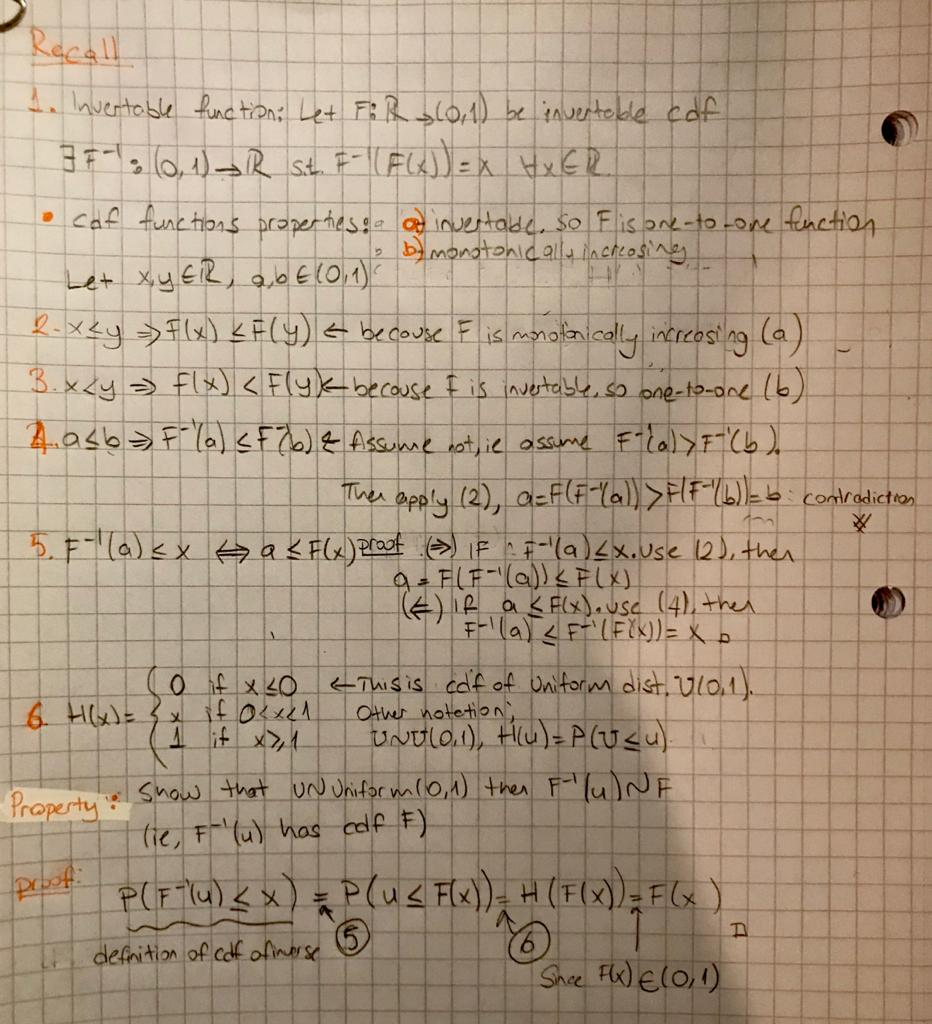

## b)
We defined $F^{-1}(u) = inf \{t: f(t)\geq y\}$ in class. We used this property to show $F(x) \ge u \Rightarrow x \ge w$ where w is infemum by definition. In the video, he uses the property of cdf function which is monotonically increasing and also, inverse of cdf function is also monotonically increasing (In my proof, last line recall-(5)).

### Exercise 4 (from Rizzo text)
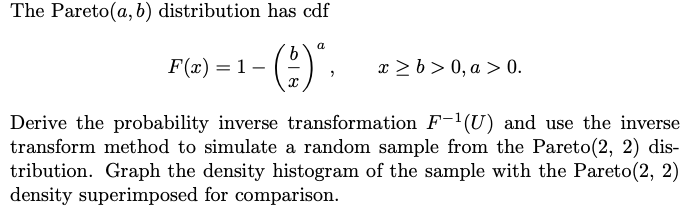

### Answer 
$F_(x) = 1 - (\frac{2}{x})^2$, where $Pareto(2,2)$, $x \ge 2$. <br>
<br> So, $F^{-1}_ (u) = \pm \frac{2}{\sqrt{u-1}}$ where. Since $0 < u < 1$, I will use  $F^{-1}_ (u) =\frac{2}{\sqrt{u}}$
<br><br> I need pdf function of Pareto(2,2) which is $f_(x)= \frac{8}{x^3}$

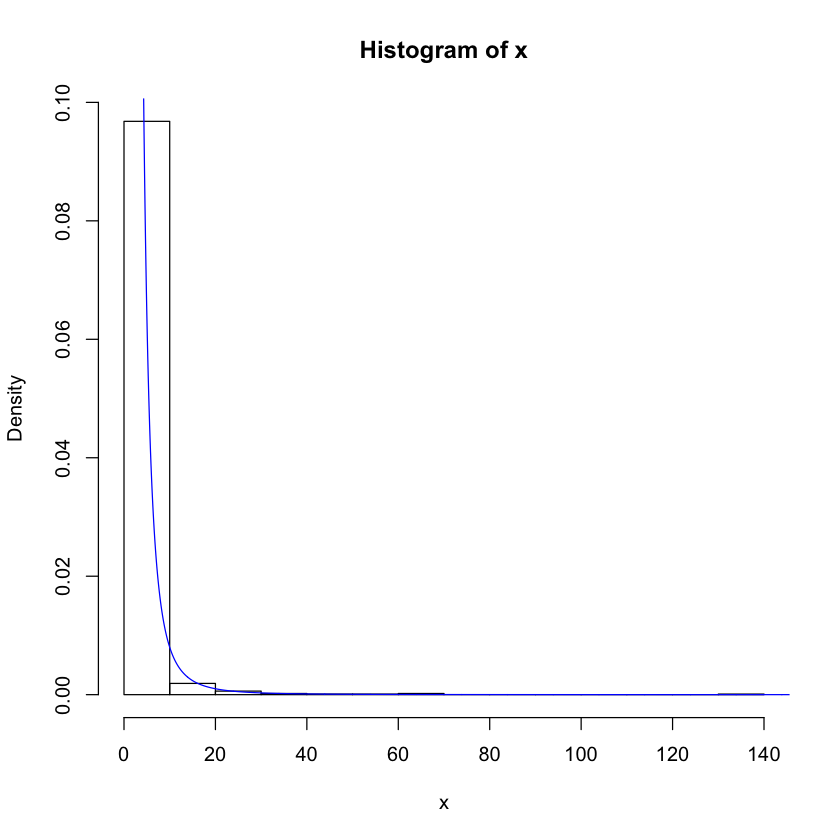

In [1]:
n = 1000
u = runif(n)
x = 2/sqrt(u)
hist(x, prob=TRUE)
y = seq(0,1000, 0.1)
lines(y, 8/y^3, col="blue")

### Exercise 5 (from Rizzo text)

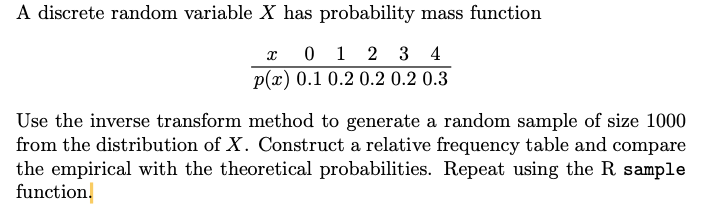

### Answer
First, I will write inverse function of cdf. <br>
$F^{-1}_(u)= \begin{cases} x=4 \;\;\;if\;\;\; 0.7 < u < 1 \\ x=3 \;\;\;if\;\;\; 0.5 < u \le 0.7 
\\ x = 2 \;\;\;if\;\;\; 0.3 < u \le 0.5 \\  x= 1 \;\;\;if\;\;\; 0.1 < u \le 0.3 \\ x=0 \;\;\;if\;\;\; 0 < u\le 0.1 \end{cases}$

Then I used the inverse transform method to generate random variables from the distribution of X. 
I divided the frequencies to the random sample size to get empirical probabilities. Finally, I compare empirical & theoretical probabilities which are very close to each other.



In [17]:
# Generate random variable with distribution X, by using inverse transformation method.
# This is empirical probability.
n = 1000
u = runif(n)  

x_vector = vector(length=n)
  
for(i in 1:length(u)) {
    if (u[i] < 1 & u[i] > 0.7) { x_vector[i] = 4}
    else if (u[i] <= 0.7 & u[i] > .5) {x_vector[i] = 3}
    else if (u[i] <= 0.5 & u[i] > .3){ x_vector[i] = 2}
    else if (u[i] <= 0.3 & u[i] > .1){ x_vector[i] = 1}
    else if (u[i] <= 0.1 ){ x_vector[i] = 0}
}
# Create a frequency table of r.v.'s'
x_t = table(x_vector)
p_x = c(0.1, 0.2, 0.2, 0.2, 0.3 )
#divided frequencies to 1000 (size of random sample) to get empirical probabilities
table_x <- rbind(as.numeric(names(x_t)), x_t, x_t/1000, p_x)
rownames(table_x ) <- c("x", "freq(x)","p_(x)_empirical", "p_(x)_theoretical")
table_x 

,0,1,2,3,4
x,0.000,1.000,2.000,3.00,4.0
freq(x),105.000,224.000,191.000,180.00,300.0
p_(x)_empirical,0.105,0.224,0.191,0.18,0.3
p_(x)_theoretical,0.100,0.200,0.200,0.20,0.3


I generate random variables from the distribution of X by using "sample" function. Then I found empirical probabilities by dividing frequencies to the n. In this case, empirical & theoretical  probabilities are similar again, as expected.


In [16]:
#This is another way to generate random variables with distribution X. I used sample function.
# # This is empirical probability.
x = c(0, 1, 2, 3, 4)
y_R_sample = sample(x, 1000, replace = TRUE, prob = c(0.1, 0.2, 0.2, 0.2, 0.3 ))
# Create a frequency table of r.v.'s'
y_t = table(y_R_sample)
p_x = c(0.1, 0.2, 0.2, 0.2, 0.3 )
#divided frequencies to 1000 (size of random sample) to get empirical probabilities
table_y <- rbind(as.numeric(names(y_t)),y_t, y_t/1000, p_x) #divided frequencies to 1000 (size of random sample) to 
rownames(table_y ) <- c("x", "freq(x)","p_(x)_empirical", "p_(x)_theoretical")
table_y

,0,1,2,3,4
x,0.000,1.000,2.000,3.000,4.000
freq(x),94.000,201.000,212.000,215.000,278.000
p_(x)_empirical,0.094,0.201,0.212,0.215,0.278
p_(x)_theoretical,0.100,0.200,0.200,0.200,0.300
